In [2]:
import numpy as np
import math
import matplotlib.pyplot as plt

p = np.load('alice_mc_lorentz_jets_80_90.npy', mmap_mode='r')
labels = np.load('alice_mc_labels_80_90.npy', mmap_mode='r')
R=1
def notzero(i):
    N=0
    m=p[i][0:][0:]
    while True:
        N=N+1
        if m[N][0]<0.000001:
            break
    return p[i][0:N][0:]
        

def update(m):
    y=[0.5*math.log((m[i][0]+m[i][3])/(m[i][0]-m[i][3])) for i in range(m.shape[0])]
    pt=[np.sqrt(m[i][1]**2+m[i][2]**2) for i in range(m.shape[0])]
    azimut=[math.acos(m[i][1]/pt[i]) for i in range(m.shape[0])]
    global d
    d=np.ndarray((m.shape[0],m.shape[0]))
    for i in range(m.shape[0]):
        for j in range(m.shape[0]):
            d[i][j]=((y[i]-y[j])**2+(azimut[j]-azimut[i])**2)/R**2
        
def minimum(m):
    k=0
    l=1
    mini=m[0][1]
    for i in range(0,m.shape[0]):
        for j in range(i+1,m.shape[0]):
            if m[i][j]<mini:
                mini=m[i][j]
                k=i
                l=j
    return [k,l,mini]


def cluster(m):
    t=minimum(d)
    čestica1=t[0]
    čestica2=t[1]
    if čestica1>čestica2:
        r=čestica1
        čestica1=čestica2
        čestica2=r
    n=np.shape(m)
    b=np.ndarray((n[0]-1,4))
    s=m[čestica1]+m[čestica2]
    i=0
    j=0
    while i<m.shape[0]:
        if i==čestica1:
            b[j][:]=s
            i=i+1
            j=j+1
        elif i==čestica2:
            if i<m.shape[0]-1:
                b[j][:]=m[i+1][:]
            else:
                break
            i=i+2
            j=j+1
        else:
            b[j][:]=m[i][:]
            i=i+1
            j=j+1
    return b
                



In [3]:
def recluster(m):
    update(m)
    x=[]
    D=[]
    x.append(m)
    D.append(d)
    for i in range(m.shape[0]-1):
        m=cluster(m)
        update(m)
        x.append(m)
        D.append(d)
    return x,D

def decluster(x,D):
    n=len(x)
    L=[]
    i=n-2
    čes=0
    #pcut=1000
    while i>=0:
        m=minimum(D[i])
        čestica1=m[0]
        čestica2=m[1]
        if čestica2<čestica1:
            r=čestica1
            čestica1=čestica2
            čestica2=r
        if čes==čestica1:
            pt1=np.sqrt(x[i][čestica1][1]**2+x[i][čestica1][2]**2)
            pt2=np.sqrt(x[i][čestica2][1]**2+x[i][čestica2][2]**2)
            #if pt1<pcut or pt2<pcut:
                #break
            if pt1<pt2:
                L.append([pt1*m[2],m[2]])
                čes=čestica2
            else:
                L.append([pt2*m[2],m[2]])
                čes=čestica1
        else:
            if čes<čestica2:
                pass
            else:
                čes=čes+1
        i=i-1
    return L




        
        
        
        
        
    
    
    
    

        
    
    

In [4]:
def qg(i):
    m=labels[i]
    return m

    
    
    


In [116]:
kt=[]
dlt=[]
for j in range(20000):
    recluster(notzero(j))
    x,D=recluster(notzero(j))
    L=decluster(x,D)
    kts=[np.log(L[i][0]) for i in range(len(L))]
    dlts=[np.log(1/L[i][1]) for i in range(len(L))]
    kt=kt+kts
    dlt=dlt+dlts







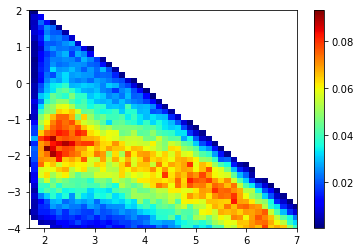

In [130]:
zu,xedges,yedges=np.histogram2d(dlt,kt,120,normed='True')
zu[zu == 0] = 'nan'
plt.pcolormesh(xedges,yedges,zu.T,cmap='jet')
plt.ylim([-4,2])
plt.xlim([1.7,7])
plt.colorbar()
plt.show()


In [14]:
ktq=[]
dltq=[]
t=0
j=0
while(t<200000):
    if qg(j)==0:
        recluster(notzero(j))
        x,D=recluster(notzero(j))
        L=decluster(x,D)
        kts=[np.log(L[i][0]) for i in range(len(L))]
        dlts=[np.log(1/L[i][1]) for i in range(len(L))]
        ktq=ktq+kts
        dltq=dltq+dlts
        t=t+1
    j=j+1
print(j)


231545


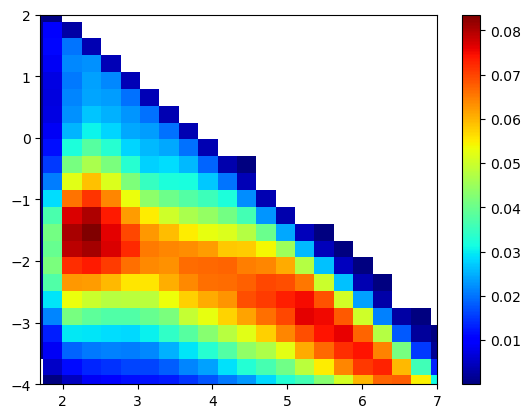

[ 1.21963862  1.4786145   1.73759037  1.99656624  2.25554212  2.51451799
  2.77349386  3.03246974  3.29144561  3.55042148  3.80939736  4.06837323
  4.32734911  4.58632498  4.84530085  5.10427673  5.3632526   5.62222847
  5.88120435  6.14018022  6.39915609  6.65813197  6.91710784  7.17608371
  7.43505959  7.69403546  7.95301133  8.21198721  8.47096308  8.72993895
  8.98891483  9.2478907   9.50686657  9.76584245 10.02481832 10.2837942
 10.54277007 10.80174594 11.06072182 11.31969769 11.57867356 11.83764944
 12.09662531 12.35560118 12.61457706 12.87355293 13.1325288  13.39150468
 13.65048055 13.90945642 14.1684323  14.42740817 14.68638404 14.94535992
 15.20433579 15.46331166 15.72228754 15.98126341 16.24023929 16.49921516
 16.75819103 17.01716691 17.27614278 17.53511865 17.79409453 18.0530704
 18.31204627 18.57102215 18.82999802 19.08897389 19.34794977 19.60692564
 19.86590151 20.12487739 20.38385326 20.64282913 20.90180501 21.16078088
 21.41975675 21.67873263 21.9377085 ]


In [63]:
zq,xedges,yedges=np.histogram2d(dltq,ktq,80,normed='True')
zq[zq == 0] = 'nan'
plt.pcolormesh(xedges,yedges,zq.T,cmap='jet')
plt.colorbar()
plt.ylim([-4,2])
plt.xlim([1.7,7])
plt.show()
print(xedges)

In [16]:
ktg=[]
dltg=[]
t=0
j=0
while(t<200000):
    if qg(j)==1:
        recluster(notzero(j))
        x,D=recluster(notzero(j))
        L=decluster(x,D)
        kts=[np.log(L[i][0]) for i in range(len(L))]
        dlts=[np.log(1/L[i][1]) for i in range(len(L))]
        ktg=ktg+kts
        dltg=dltg+dlts
        t=t+1
    j=j+1

print(j)

IndexError: index 1263216 is out of bounds for axis 0 with size 1263216

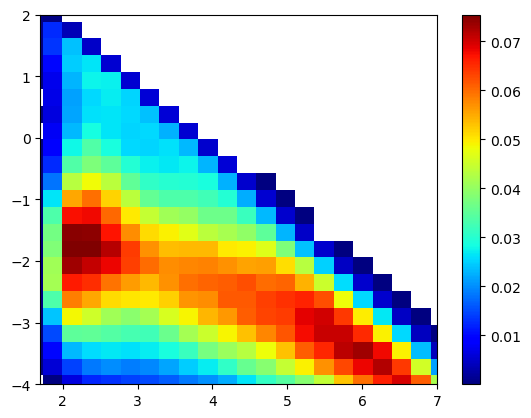

1263216


In [64]:
z=np.histogram2d(dltg,ktg,bins=(xedges,yedges),normed='True')[0]
z[z == 0] = 'nan'
plt.pcolormesh(xedges,yedges,z.T,cmap='jet')
plt.colorbar()
plt.ylim([-4,2])
plt.xlim([1.7,7])
plt.show()
print(j)

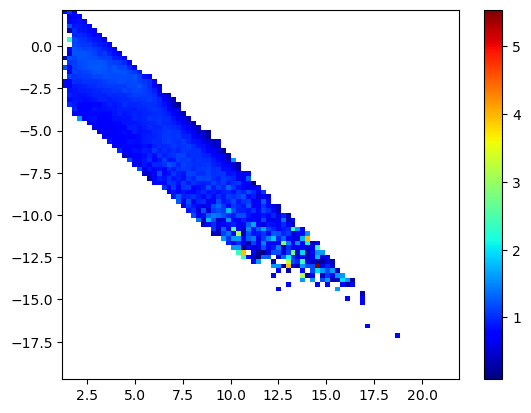

In [66]:
LL=zq/z
plt.pcolormesh(xedges,yedges,LL.T,cmap='jet')
plt.colorbar()
plt.show()


In [77]:



rezs=[]

for i in range (200000,210000):
    lbl=[]
    x,D=recluster(notzero(i))
    L=decluster(x,D)
    kk=[np.log(L[i][0]) for i in range(len(L))]
    dd=[np.log(1/L[i][1]) for i in range(len(L))]
    zz=np.histogram2d(dd,kk,bins=(xedges,yedges))[0]
    res=np.multiply(zz,LL)
    res[res!=res]=0
    nx,ny=np.nonzero(res)
    nenul=zip(nx,ny)
    rez=1
    for y in nenul:
        rez=rez*res[y]
    rezs.append(rez)


    


  
        
        
    
    
    

    
    
    
        
        
    
    

In [84]:
gr=np.arange(max(rezs)-0.00001,min(rezs)+0.00001,-0.005)
effs=[]
rejs=[]


for g in gr:
    tp=0
    fn=0
    fp=0
    tn=0
    br=0
    for j in range(200000,210000):
        if g<rezs[br]:
            if labels[j]==1:
                tp=tp+1
            else:
                fp=fp+1
        if g>rezs[br]:
            if labels[j]==1:
                fn=fn+1
            else:
                tn=tn+1
        br=br+1
    effs.append(tp/(tp+fn))
    rejs.append(1-fp/(fp+tn))
        
    
    
            
            
           
        
        
        


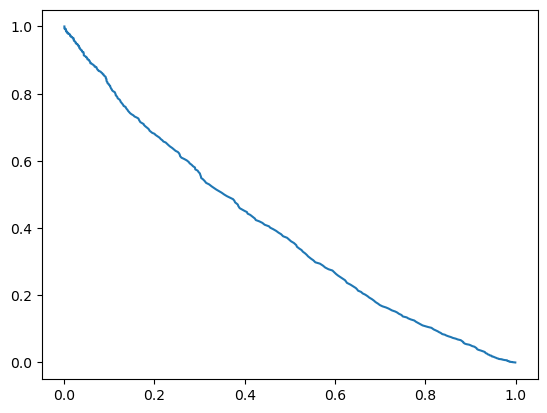

In [85]:
plt.plot(effs,rejs)
plt.show()

In [58]:
plt.plot(L

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
1.1074252304965178


In [36]:
minx=0
miny=0
maxx=0
maxy=0
for j in range(200000):
    x,D=recluster(notzero(j))
    L1=decluster(x,D)
    k1=[np.log(L1[i][0]) for i in range(len(L1))]
    d1=[np.log(1/L1[i][1]) for i in range(len(L1))]
    if minx>min(d1):
        minx=min(d1)
    if miny>min(k1):
        miny=min(k1)
    if maxx<max(d1):
        maxx=max(d1)
    if maxy<max(k1):
        maxy=max(k1)

    

In [37]:
print(minx,miny,maxx,maxy)

0 -19.72554557793501 21.937708501524018 2.1171446389929063


In [123]:
rapidities=[]
azimuts=[]
def rapazi(m):
    global y
    y=[0.5*math.log((m[i][0]+m[i][3])/(m[i][0]-m[i][3])) for i in range(m.shape[0])]
    pt=[np.sqrt(m[i][1]**2+m[i][2]**2) for i in range(m.shape[0])]
    global azimut
    azimut=[math.acos(m[i][1]/pt[i]) for i in range(m.shape[0])]
    
    

for j in range(10000):
    if qg(j)==0:
        rapazi(notzero(j))
        rapidities=rapidities+y
        azimuts=azimuts+azimut
    



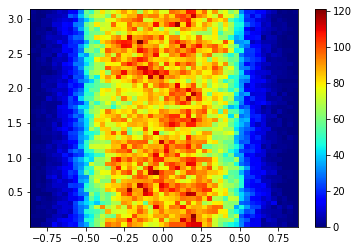

In [124]:
z,xedges,yedges=np.histogram2d(rapidities,azimuts,50)
plt.pcolormesh(xedges,yedges,z.T,cmap='jet')
plt.colorbar()
plt.show()  

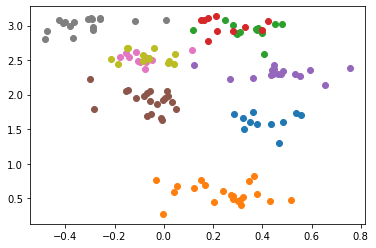

In [126]:
rapidities=[]
azimuts=[]
def rapazi(m):
    global y
    y=[0.5*math.log((m[i][0]+m[i][3])/(m[i][0]-m[i][3])) for i in range(m.shape[0])]
    pt=[np.sqrt(m[i][1]**2+m[i][2]**2) for i in range(m.shape[0])]
    global azimut
    azimut=[math.acos(m[i][1]/pt[i]) for i in range(m.shape[0])]
    
    

for j in range(10):
    if qg(j)==0:
        rapazi(notzero(j))
        plt.scatter(y,azimut)
    



plt.show() 